In [4]:
from preprocessing import *
import os
import negex

ROOT_DIR = os.path.dirname(os.path.abspath(""))

test_data = json.load(open(os.path.join(ROOT_DIR, "data", "test_data.json"), "r"))

In [3]:
sents = sent_tokenize_corpus(test_data)

100%|██████████| 64/64 [00:23<00:00,  2.78it/s]


In [5]:
nlp_es, nlp_cat = load_nlps()
tokens = tokenize_corpus(sents, nlp_es, nlp_cat)

100%|██████████| 64/64 [00:01<00:00, 51.49it/s]


In [6]:
tokens_lemmatized = lemmatize_corpus(tokens, nlp_es, nlp_cat)

100%|██████████| 64/64 [00:21<00:00,  3.01it/s]


In [7]:
save_tokens(tokens_lemmatized, os.path.join(ROOT_DIR, "data", "test_data_tokens.json"))

In [2]:
tokens_lemmatized = load_tokens(os.path.join(ROOT_DIR, "data", "test_data_tokens.json"))

In [9]:
predictions = negex.process_data(tokens_lemmatized)

100%|██████████| 64/64 [00:03<00:00, 20.77it/s]


In [10]:
predictions_copy = predictions.copy()

In [5]:
negex.write_predictions(test_data, predictions_copy, "test_data_predictions.json")

In [18]:
from eval import EvalOfficial

with open(os.path.join(ROOT_DIR, "data", 'test_data.json'), 'r', encoding='utf8') as _f:
	test_data = json.load(_f)

with open(os.path.join(ROOT_DIR, "data", 'test_data_predictions.json'), 'r', encoding='utf8') as _f:
	test_data_predictions = json.load(_f)

metric = EvalOfficial()
p, r, f1 = metric.calc(test_data_predictions, test_data)
print("Testing")
print(f'Precision: {p}, Recall:{r}, F1:{f1}')

Testing
Precision: 0.8814994578406568, Recall:0.8814994578406568, F1:0.8814994578406568


### Experimentation

In [1]:
from eval import *
from preprocessing import *
import os

ROOT_DIR = os.path.dirname(os.path.abspath(""))

eval = EvalNegex(
	os.path.join(ROOT_DIR, "temp"),
	os.path.join(ROOT_DIR, "data"),
	os.path.join(ROOT_DIR, "data", 'test_data.json'),
	load_existing_tokens=True
)

In [2]:
eval.evaluate(max_context_size=5)

100%|██████████| 64/64 [00:03<00:00, 21.03it/s]


{'precision': 0.8851533384562582,
 'recall': 0.8851533384562582,
 'f1': 0.8851533384562582,
 'time': 3.2112}

In [3]:
for i in range(1, 15):
	eval.evaluate(max_context_size=i)

100%|██████████| 64/64 [00:03<00:00, 21.29it/s]


In [26]:
results = json.load(open(os.path.join(ROOT_DIR, "data", "results.json"), "r"))["Negex"]
results = sorted(results, key=lambda x: x["hyperparameters"]["max_context_size"])
precision, recall, f1, times = [], [], [], []
for i in range(1, 15):
	precision.append(results[i - 1]["metrics"]["precision"])
	recall.append(results[i - 1]["metrics"]["recall"])
	f1.append(results[i - 1]["metrics"]["f1"])
	times.append(results[i - 1]["metrics"]["time"])

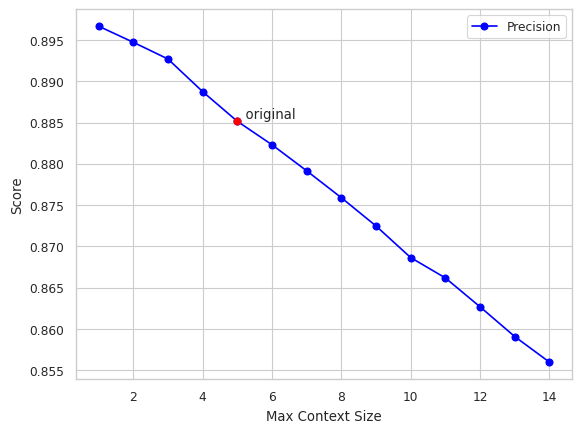

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme("paper")
sns.set_context("paper")
sns.set_style("whitegrid")

plt.plot(range(1, 15), precision, label="Precision", marker="o", color="blue")
# highlight value at 5
plt.plot(5, precision[4], marker="o", color="red")
plt.text(5, precision[4], "  original", ha="left", va="bottom")
plt.xlabel("Max Context Size")
plt.ylabel("Score")
plt.legend()
plt.show()

In [25]:
precision[0]

0.8966799194506119

In [27]:
avg_time = sum(times) / len(times)
avg_time

3.118721428571429